In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read data

In [52]:
df_ind = pd.read_csv('../data_ind.csv')

In [53]:
df_oecd = pd.read_csv('../data_oecd.csv')

In [54]:
df_oecd = df_oecd.sort_values(by=['Country', 'Time_Period'])
df_oecd['Time_Period'] = pd.to_datetime(df_oecd['Time_Period'], format='%Y-%m')

In [55]:
df_deu = df_oecd[(df_oecd['Country'] == 'DEU')]
df_usa = df_oecd[(df_oecd['Country'] == 'USA')]

In [56]:
# Convert df_ind to match the OECD format
df_ind['Time_Period'] = df_ind['Year'].astype(str) + '-' + df_ind['Quarter'].map({'Q1': '02', 'Q3': '08'})
df_ind['Country'] = 'IND'  # Add country column
df_ind.rename(columns={'Unemployment Rate': 'Unemployment_Rate'}, inplace=True)

# Select only the relevant columns
df_ind = df_ind[['Country', 'Time_Period', 'Unemployment_Rate']]
df_ind['Time_Period'] = pd.to_datetime(df_ind['Time_Period'], format='%Y-%m')

### descriptive statistics

In [57]:
df_ind.describe()

,Time_Period,Unemployment_Rate
count,40,58.000000
mean,2014-11-01 03:00:00,6.220862
min,2005-02-01 00:00:00,2.550000
25%,2009-12-17 00:00:00,5.010000
50%,2014-11-01 00:00:00,5.870000
75%,2019-09-16 00:00:00,7.462500
max,2024-08-01 00:00:00,11.240000
std,NaN,2.201112


In [58]:
df_deu.describe()

,Time_Period,Unemployment_Rate
count,360,360.000000
mean,2009-12-15 22:56:00,6.536944
min,1995-01-01 00:00:00,2.800000
25%,2002-06-23 12:00:00,3.800000
50%,2009-12-16 12:00:00,6.750000
75%,2017-06-08 12:00:00,8.800000
max,2024-12-01 00:00:00,12.200000
std,NaN,2.690579


In [59]:
df_usa.describe()

,Time_Period,Unemployment_Rate
count,360,360.000000
mean,2009-12-15 22:56:00,5.569167
min,1995-01-01 00:00:00,3.100000
25%,2002-06-23 12:00:00,4.300000
50%,2009-12-16 12:00:00,5.100000
75%,2017-06-08 12:00:00,6.100000
max,2024-12-01 00:00:00,14.400000
std,NaN,1.843703


### select time period

In [60]:
select_df_ind = df_ind[df_ind['Time_Period'].dt.year >= 2005]
select_df_deu = df_deu[df_deu['Time_Period'].dt.year >= 2005]
select_df_usa = df_usa[df_usa['Time_Period'].dt.year >= 2005]


In [62]:
select_df_ind.describe()

,Time_Period,Unemployment_Rate
count,40,40.000000
mean,2014-11-01 03:00:00,6.765500
min,2005-02-01 00:00:00,4.820000
25%,2009-12-17 00:00:00,5.487500
50%,2014-11-01 00:00:00,6.150000
75%,2019-09-16 00:00:00,7.577500
max,2024-08-01 00:00:00,11.240000
std,NaN,1.758675


In [63]:
select_df_deu.describe()

,Time_Period,Unemployment_Rate
count,240,240.000000
mean,2014-12-16 05:00:00,5.315417
min,2005-01-01 00:00:00,2.800000
25%,2009-12-24 06:00:00,3.400000
50%,2014-12-16 12:00:00,4.550000
75%,2019-12-08 18:00:00,6.725000
max,2024-12-01 00:00:00,12.200000
std,NaN,2.448048


In [64]:
select_df_usa.describe()

,Time_Period,Unemployment_Rate
count,240,240.000000
mean,2014-12-16 05:00:00,5.817500
min,2005-01-01 00:00:00,3.100000
25%,2009-12-24 06:00:00,4.100000
50%,2014-12-16 12:00:00,5.100000
75%,2019-12-08 18:00:00,7.300000
max,2024-12-01 00:00:00,14.400000
std,NaN,2.152634


### initial visualisations

In [14]:
# Function for plotting time series
def plot_time_series(df, x, y, hue=None, title=None, xlabel=None, ylabel=None, rotation=45, **kwargs):
    """
    Function to plot time series with options for hue and other styling.
    
    Parameters:
    - df: The DataFrame containing the data
    - x: The column name for the x-axis
    - y: The column name for the y-axis
    - hue: (optional) The column name for the hue (grouping variable)
    - title: (optional) The title of the plot
    - xlabel: (optional) The label for the x-axis
    - ylabel: (optional) The label for the y-axis
    - rotation: (optional) The rotation of the x-axis labels
    - kwargs: Additional keyword arguments for `sns.lineplot`
    """
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=x, y=y, hue=hue, **kwargs)
    plt.xticks(rotation=rotation)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

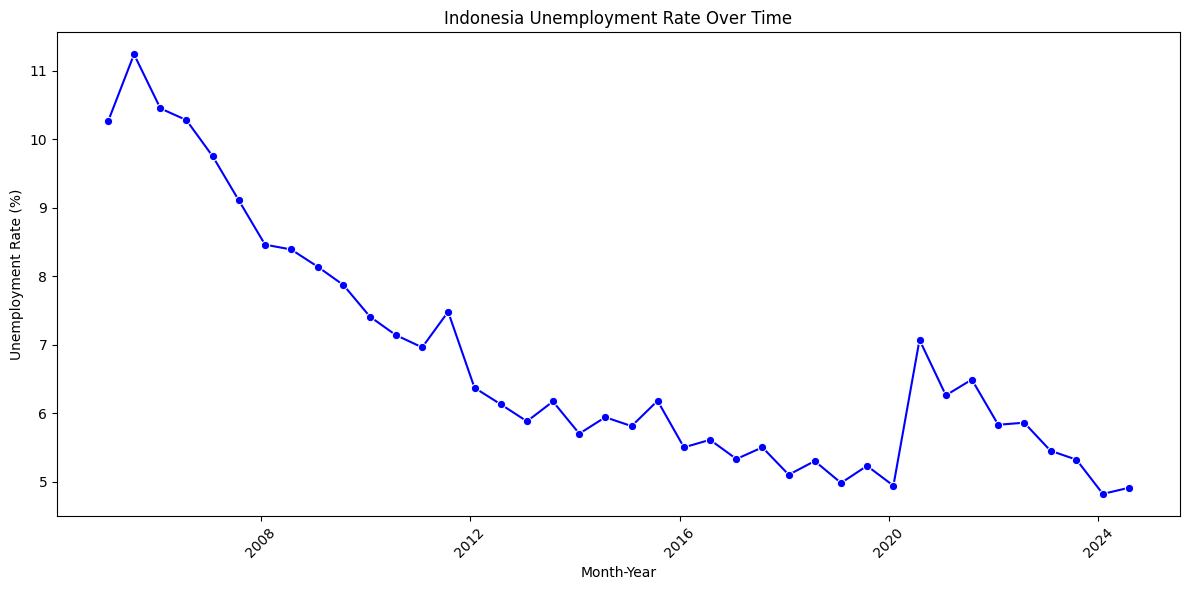

In [65]:
plot_time_series(select_df_ind, x="Time_Period", y="Unemployment_Rate", 
                 title="Indonesia Unemployment Rate Over Time",
                 xlabel="Month-Year", ylabel="Unemployment Rate (%)", 
                 marker="o", color='blue')

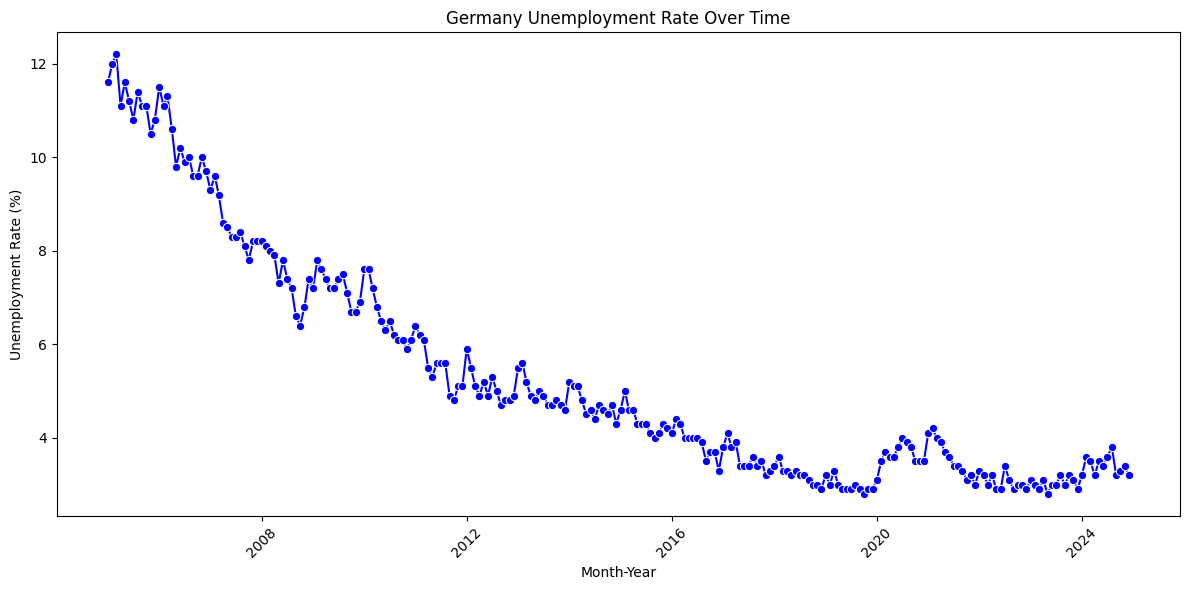

In [66]:
plot_time_series(select_df_deu, x="Time_Period", y="Unemployment_Rate", 
                 title="Germany Unemployment Rate Over Time",
                 xlabel="Month-Year", ylabel="Unemployment Rate (%)", 
                 marker="o", color='blue')

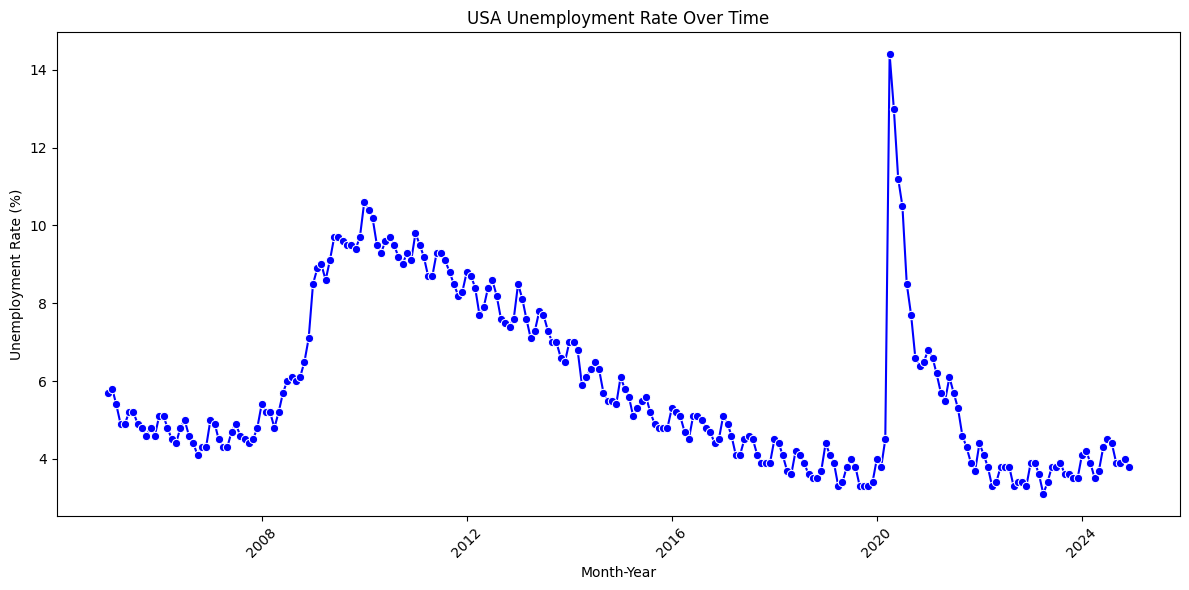

In [67]:
plot_time_series(select_df_usa, x="Time_Period", y="Unemployment_Rate", 
                 title="USA Unemployment Rate Over Time",
                 xlabel="Month-Year", ylabel="Unemployment Rate (%)", 
                 marker="o", color='blue')

In [68]:
def plot_distribution(df_1, df_2, df_3, column, xlabel=None, ylabel=None):
    """
    Function to plot the density comparison of unemployment rates for IND, DEU, and USA.
    
    Parameters:
    - df_1, df_2, df_3: DataFrames containing the data
    - column: Column names for unemployment rate in each DataFrame
    - xlabel, ylabel: Labels for the x and y axes (optional)
    """
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_1[column], color='green', label='IND', linewidth=2)
    sns.kdeplot(df_2[column], color='blue', label='DEU', linewidth=2)
    sns.kdeplot(df_3[column], color='red', label='USA', linewidth=2)

    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.title("Density Plot of Unemployment Rates")
    plt.legend()
    plt.tight_layout()
    plt.show()


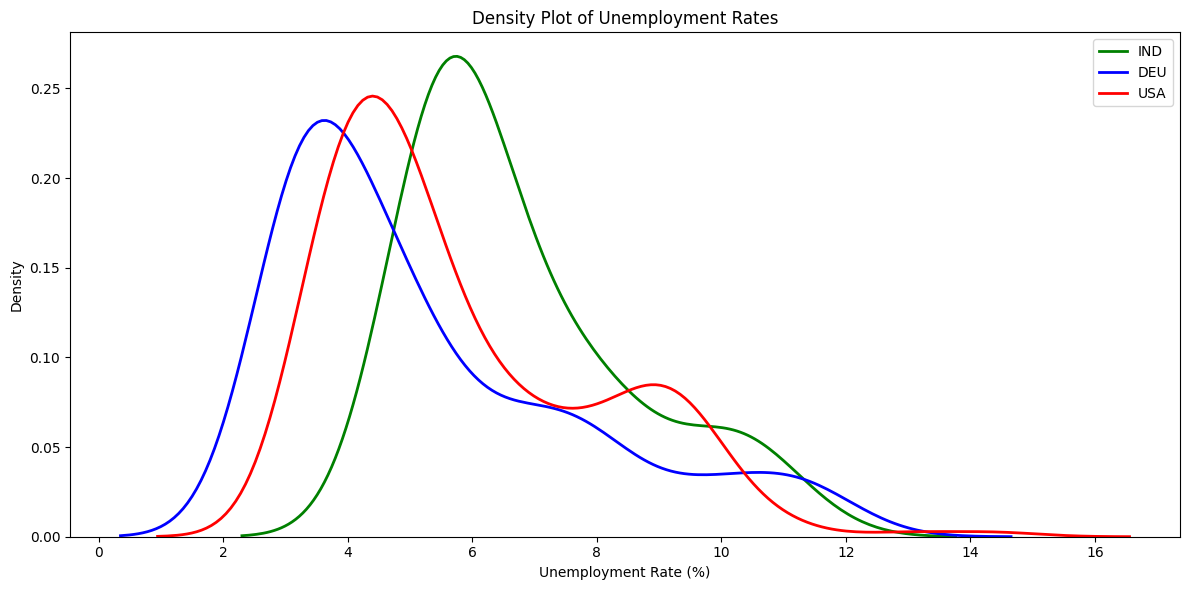

In [69]:
plot_distribution(select_df_ind, select_df_deu, select_df_usa, 'Unemployment_Rate', xlabel="Unemployment Rate (%)", ylabel="Density")

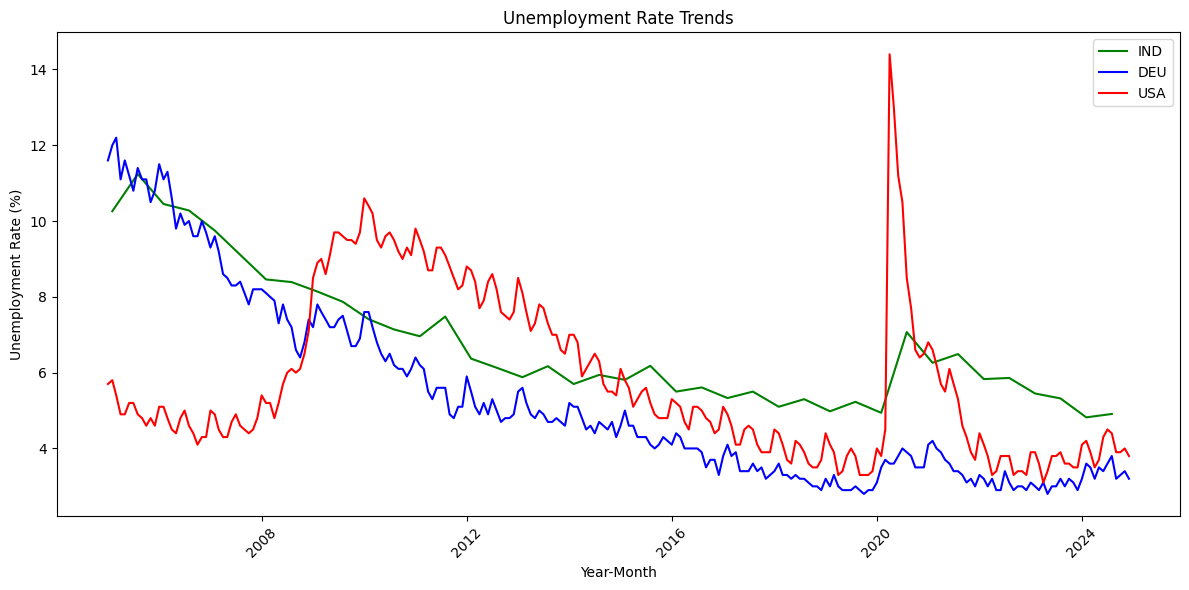

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=select_df_ind, x="Time_Period", y="Unemployment_Rate", color='green', label='IND')
sns.lineplot(data=select_df_deu, x="Time_Period", y="Unemployment_Rate", color='blue', label='DEU')
sns.lineplot(data=select_df_usa, x="Time_Period", y="Unemployment_Rate", color='red', label='USA')
plt.xticks(rotation=45)
plt.title("Unemployment Rate Trends")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.tight_layout()
plt.show()